In [1]:
# loading packages and functions
import sys

sys.path.append("./src")
import torch
import numpy as np
from matplotlib import pyplot as plt

from Neural_Fact import Net, Energy_Loss_Tensor, outer_product, outer_product_np

from trainNNCPD import train

import torch.nn as nn
from torch.autograd import Variable
from writer import Writer

from sklearn.decomposition import NMF

import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac, non_negative_parafac

Using numpy backend.


In [2]:
## set the network parameters
torch.set_default_tensor_type(torch.DoubleTensor)


n1 = 40
n2 = 40
n3 = 40

r = 12


a = 1
b = 3

X = np.zeros((40,40,40))


X[0:10,0:15,0:15] = a * np.ones((10,15,15))
X[10:25,15:25,15:30] = a * np.ones((15,10,15))
X[25:40,25:40,30:40] = a * np.ones((15,15,10))

X[0:5,0:10,0:5] = b
X[5:10,10:15,5:15] = b

X[10:15,15:18,15:20] = b
X[15:20,18:23,20:25] = b
X[20:25,23:25,25:30] = b

X[25:30,25:35,30:35] = b
X[30:40,35:40,35:40] = b

#add Gaussian Noise
np.random.seed(0)
X = X + 0.5 * np.abs(np.random.randn(40, 40, 40))

In [3]:
vmin=0
vmax=3

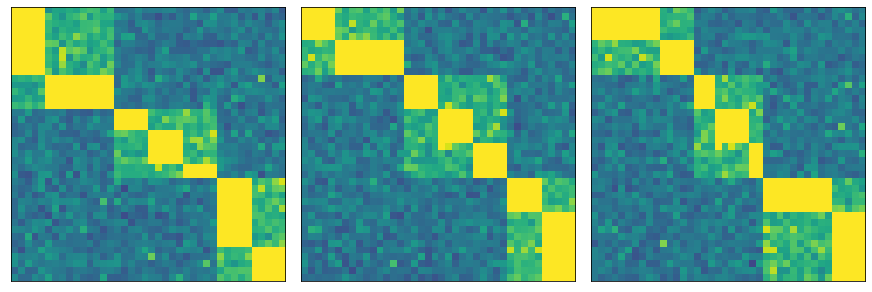

In [4]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(12,5))
axs[0].axes.get_xaxis().set_ticks([])
axs[0].axes.get_yaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[1].axes.get_yaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[2].axes.get_yaxis().set_ticks([])
color = "viridis"
X_max = np.max(X,axis=0)
axs[0].imshow(X_max, cmap=plt.get_cmap(color), vmin=vmin, vmax=vmax)
X_max = np.max(X,axis=1)
axs[1].imshow(X_max, cmap=plt.get_cmap(color), vmin=vmin, vmax=vmax)
X_max = np.max(X,axis=2)
axs[2].imshow(X_max, cmap=plt.get_cmap(color), vmin=vmin, vmax=vmax)
plt.show()

In [5]:
X = torch.from_numpy(X)
X_np = np.asarray(X)

In [36]:
# unsupervised case,one layer
r=7
n1,n2,n3 = X.shape
net = Net([7,5,3])

loss_func = Energy_Loss_Tensor()

history_unsupervised = train(net, X, loss_func, r, epoch = 30000, lr = 0.0003)


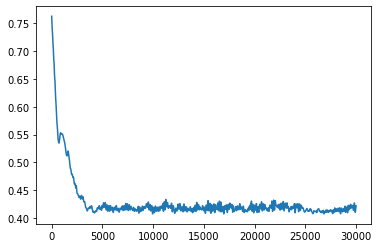

In [37]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

In [38]:
X1 = history_unsupervised.get('X1')[-1]
X2 = history_unsupervised.get('X2')[-1]
X3 = history_unsupervised.get('X3')[-1]

S1 = history_unsupervised.get('S1')[-1]
S2 = history_unsupervised.get('S2')[-1]

Reconstruction loss: 78.02716601846191
Relative reconstruction loss: 0.39041848431097836


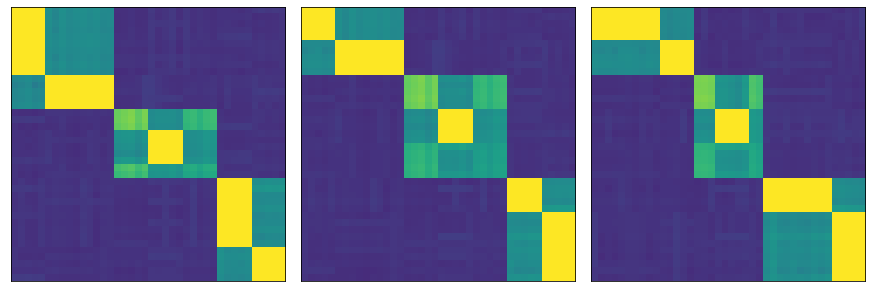

In [39]:
approx = outer_product([X1, X2, X3]).numpy()
print("Reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X_np-approx), 2))
print("Relative reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X_np-approx), 2)  / np.linalg.norm(np.ndarray.flatten(X_np), 2))

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(12,5))
axs[0].axes.get_xaxis().set_ticks([])
axs[0].axes.get_yaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[1].axes.get_yaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[2].axes.get_yaxis().set_ticks([])
X_max = np.max(approx,axis=0)
axs[0].imshow(X_max, vmin=vmin, vmax=vmax)
X_max = np.max(approx,axis=1)
axs[1].imshow(X_max, vmin=vmin, vmax=vmax)
X_max = np.max(approx,axis=2)
axs[2].imshow(X_max, vmin=vmin, vmax=vmax)
plt.show()

Reconstruction loss: 97.83411766662617
Relative reconstruction loss: 0.48952499343970196


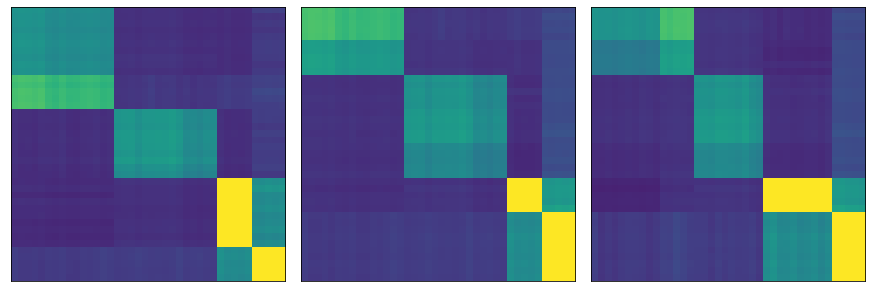

In [40]:
approx = outer_product([torch.mm(X1,S1.T), torch.mm(X2,S1.T), torch.mm(X3,S1.T)]).numpy()
print("Reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X_np-approx), 2))
print("Relative reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X_np-approx), 2)  / np.linalg.norm(np.ndarray.flatten(X_np), 2))

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(12,5))
axs[0].axes.get_xaxis().set_ticks([])
axs[0].axes.get_yaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[1].axes.get_yaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[2].axes.get_yaxis().set_ticks([])
X_max = np.max(approx,axis=0)
axs[0].imshow(X_max, vmin=vmin, vmax=vmax)
X_max = np.max(approx,axis=1)
axs[1].imshow(X_max, vmin=vmin, vmax=vmax)
X_max = np.max(approx,axis=2)
axs[2].imshow(X_max, vmin=vmin, vmax=vmax)
plt.show()

Reconstruction loss: 106.5634186198897
Relative reconstruction loss: 0.5332031201893156


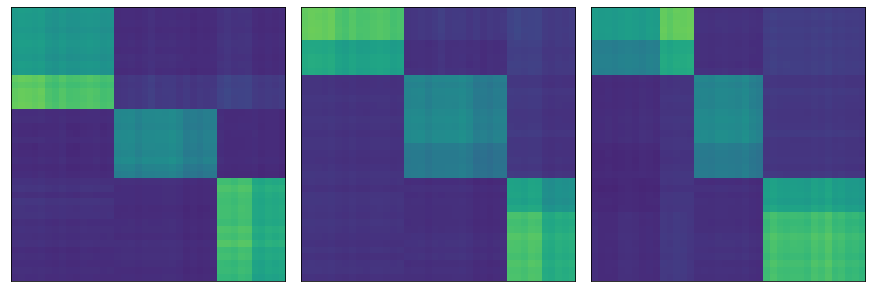

In [41]:
approx = outer_product([torch.mm(torch.mm(X1,S1.T),S2.T), torch.mm(torch.mm(X2,S1.T),S2.T), torch.mm(torch.mm(X3,S1.T),S2.T)]).numpy()
print("Reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X_np-approx), 2))
print("Relative reconstruction loss:", np.linalg.norm(np.ndarray.flatten(X_np-approx), 2)  / np.linalg.norm(np.ndarray.flatten(X_np), 2))

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(12,5))
axs[0].axes.get_xaxis().set_ticks([])
axs[0].axes.get_yaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])
axs[1].axes.get_yaxis().set_ticks([])
axs[2].axes.get_xaxis().set_ticks([])
axs[2].axes.get_yaxis().set_ticks([])
X_max = np.max(approx,axis=0)
axs[0].imshow(X_max, vmin=vmin, vmax=vmax)
X_max = np.max(approx,axis=1)
axs[1].imshow(X_max, vmin=vmin, vmax=vmax)
X_max = np.max(approx,axis=2)
axs[2].imshow(X_max, vmin=vmin, vmax=vmax)
plt.show()

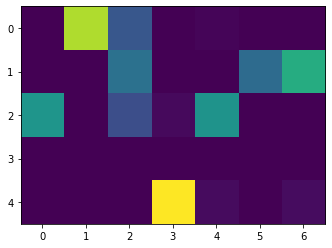

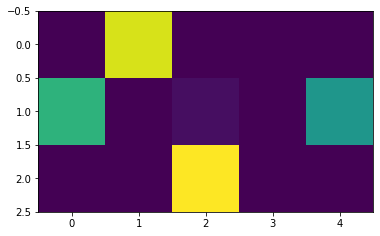

In [42]:
plt.imshow(S1)
plt.show()
plt.imshow(S2)
plt.show()